# Twitter API

**API Documentation: ** https://dev.twitter.com/rest/public

## Setting Up

In [25]:
import json
import twitter

from collections import Counter
from prettytable import PrettyTable

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def read_keys(path):
    with open(path, 'r') as f:
        keys = map(lambda s: s.strip(), f.readlines())
    return keys


KEYS_PATH = './oauth_twitter.keys.txt'
CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET = \
    read_keys(KEYS_PATH)
    
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                          CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

print twitter_api

## Exploring trends

To get codes: https://developer.yahoo.com/geo/geoplanet/

ID=1 - for the entire world

ID=2342977 -  for the US

In [3]:
# Receiving World trends and US trends
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(json.dumps(world_trends, indent=1))
print('===')
print(json.dumps(us_trends, indent=1))

[
 {
  "created_at": "2016-08-20T19:59:54Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%84%D9%86%D8%B5%D8%B1_%D8%A7%D9%84%D8%A7%D8%AA%D9%81%D8%A7%D9%82", 
    "query": "%23%D8%A7%D9%84%D9%86%D8%B5%D8%B1_%D8%A7%D9%84%D8%A7%D8%AA%D9%81%D8%A7%D9%82", 
    "tweet_volume": 121338, 
    "name": "#\u0627\u0644\u0646\u0635\u0631_\u0627\u0644\u0627\u062a\u0641\u0627\u0642", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%84%D8%A7%D8%AA%D8%AD%D8%A7%D8%AF_%D8%A7%D9%84%D8%AE%D9%84%D9%8A%D8%AC", 
    "query": "%23%D8%A7%D9%84%D8%A7%D8%AA%D8%AD%D8%A7%D8%AF_%D8%A7%D9%84%D8%AE%D9%84%D9%8A%D8%AC", 
    "tweet_volume": 60497, 
    "name": "#\u0627\u0644\u0627\u062a\u062d\u0627\u062f_\u0627\u0644\u062e\u0644\u064a\u062c", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%B5%D9%81%D9%87_%D9%8A%D8%AA%D9%85%D9%8A%D8%B2_%D8%A8%D9%87%D8%A7_%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A", 
    "query

In [4]:
# Intersection of two sets of trends

get_trends = lambda it: set([trend['name'] for trend in it[0]['trends']])

world_trends_set = get_trends(world_trends)
us_trends_set = get_trends(us_trends)

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

set([u'#triathlon', u'#WeirdConversationStarters', u'#LittleMixVFest', u'Karlos Williams', u'Betis', u'#NationalRadioDay', u'#LeiArs', u'#NYCvLA', u'#EssentialNerdMusic', u'#TransformAmericaIn5Words', u'#1YearOfDragMeDown', u'#FaceTimeMeNash'])


## Searching for tweets

https://dev.twitter.com/rest/reference/get/search/tweets

In [8]:
q = '#NationalRadioDay'

count = 100

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

for __ in range(5):
    print('Length of statuses {}'.format(len(statuses)))
    try:
        next_results = search_results['search_metadata']['next_result']
    except KeyError, e:
        break
    
    kwargs = dict([kv.split('=') for kv in next_results[1:].split('&')])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
print(json.dumps(statuses[0], indent=1))

Length of statuses 94
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @HighStrungMovie: Happy #NationalRadioDay to the amazing @DrJimmyStar @jimmystarshow @RonRussellShow We love ya both! xo #FF https://t.c\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 767091913740648448, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 2226993158, 
    "indices": [
     3, 
     19
    ], 
    "id_str": "2226993158", 
    "screen_name": "HighStrungMovie", 
    "name": "High Strung Movie"
   }, 
   {
    "id": 26570863, 
    "indices": [
     60, 
     72
    ], 
    "id_str": "26570863", 
    "screen_name": "DrJimmyStar", 
    "name": "Jimmy Star"
   }, 
   {
    "id": 162123364, 
    "indices": [
     73, 
     87
    ], 
    "id_str": "162123364", 
    "screen_name": "jimmystarshow", 
    "name": "The Jimmy Star Show"
   }, 
   {
    "id": 891265884, 
    "indices": [
     88, 
     103
    ], 
    "id_str": "891

In [9]:
print(json.dumps(search_results['search_metadata'], indent=1))

{
 "count": 100, 
 "completed_in": 0.076, 
 "max_id_str": "767091913740648448", 
 "since_id_str": "0", 
 "refresh_url": "?since_id=767091913740648448&q=%23NationalRadioDay&include_entities=1", 
 "since_id": 0, 
 "query": "%23NationalRadioDay", 
 "max_id": 767091913740648448
}


## Extracting Tweet Entities

In [10]:
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name'] for status in statuses
                  for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses
               for hashtag in status['entities']['hashtags']]

# Computee a collection of all words from all tweets
words = [w for t in status_texts
            for w in t.split()]

print('Statuses: ')
print(json.dumps(status_texts[0:5], indent=1))
print('\nScreen names: ')
print(json.dumps(screen_names[0:5], indent=1))
print('\nHashtags: ')
print(json.dumps(hashtags[0:5], indent=1))
print('\nWords: ')
print(json.dumps(words[0:5], indent=1))

Statuses: 
[
 "RT @HighStrungMovie: Happy #NationalRadioDay to the amazing @DrJimmyStar @jimmystarshow @RonRussellShow We love ya both! xo #FF https://t.c\u2026", 
 "RT @YvetteClarke: On #NationalRadioDay, I celebrate Dorothy E. Brunson, first Black woman to own and operate a radio and TV station. https:\u2026", 
 "RT @WipeHomophobia: #NationalRadioDay https://t.co/cZM70dIDAt", 
 "RT @Vote4BobCrane: #Radio runs in the family! Read abt Bob Crane's cousin Jim Senich, by Jim's son Eric. https://t.co/sbdNs0Q6jK #NationalR\u2026", 
 "RT @ArtArtistArte: \" Ghetto Blaster \" sculpture \nby Bartek Elsner Artist\n#NationalRadioDay https://t.co/YSVCOdacex https://t.co/wYVhWJrSyw"
]

Screen names: 
[
 "HighStrungMovie", 
 "DrJimmyStar", 
 "jimmystarshow", 
 "RonRussellShow", 
 "YvetteClarke"
]

Hashtags: 
[
 "NationalRadioDay", 
 "FF", 
 "NationalRadioDay", 
 "NationalRadioDay", 
 "Radio"
]

Words: 
[
 "RT", 
 "@HighStrungMovie:", 
 "Happy", 
 "#NationalRadioDay", 
 "to"
]


## Frequency analysis

In [14]:
# Basic frequency distribution    
for label, data in (('Word', words),
                   ('Screen Name', screen_names),
                   ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [pt.add_row(kv) for kv in c.most_common()[:10]]
    pt.align[label], pt.align['Count'] = 'l', 'r'
    print(pt)

+----------------------------+-------+
| Word                       | Count |
+----------------------------+-------+
| #NationalRadioDay          |    90 |
| #TransformAmericaIn5Words  |    48 |
| #EssentialNerdMusic        |    48 |
| #1YearOfDragMeDown         |    48 |
| #WeirdConversationStarters |    47 |
| RT                         |    26 |
| to                         |    16 |
| radio                      |    11 |
| the                        |     9 |
| this                       |     8 |
+----------------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| kreyolicious    |     6 |
| carelpedre      |     6 |
| WipeHomophobia  |     3 |
| KamVTV          |     2 |
| palaciodlosjugo |     2 |
| WayneDupreeShow |     2 |
| RadioPatrick    |     1 |
| kidkelly        |     1 |
| teganandsara    |     1 |
| 885WRKC         |     1 |
+-----------------+-------+
+---------------------------+-------+
| Hashtag               

## Lexical diversity

In [19]:
def lexical_diversity(tokens):
    return 1.0 * len(set(tokens)) / len(tokens)

def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses])
    return 1.0 * total_words / len(statuses)

print('Words diversity:\t{}'.format(lexical_diversity(words)))
print('Names diversity:\t{}'.format(lexical_diversity(screen_names)))
print('Tags diversity:\t\t{}'.format(lexical_diversity(hashtags)))
print('Average # of words:\t{}'.format(average_words(status_texts)))

Words diversity:	0.429824561404
Names diversity:	0.782608695652
Tags diversity:		0.0590163934426
Average # of words:	9.70212765957


# Retweet patterns

In [22]:
retweets = [
    (status['retweet_count'],
    status['retweeted_status']['user']['screen_name'],
    status['text']) for status in statuses if status.has_key('retweeted_status')
]

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[pt.add_row(row) for row in sorted(retweets, reverse=True)[:5]]
pt.max_width['Text'] = 50
pt.align = 'l'
print(pt)

+-------+--------------+----------------------------------------------------+
| Count | Screen Name  | Text                                               |
+-------+--------------+----------------------------------------------------+
| 363   | llcoolj      | RT @llcoolj: Still can’t live without it...Happy   |
|       |              | #NationalRadioDay 📻 https://t.co/qF5UkYgquY       |
| 126   | KamVTV       | RT @KamVTV: Couldn't be more honored to work with  |
|       |              | this man. The best show ever. The @WayneDupreeShow |
|       |              | #NationalRadioDay https://t.co/BUqoeF9…            |
| 126   | KamVTV       | RT @KamVTV: Couldn't be more honored to work with  |
|       |              | this man. The best show ever. The @WayneDupreeShow |
|       |              | #NationalRadioDay https://t.co/BUqoeF9…            |
| 71    | teganandsara | RT @teganandsara: Happy #NationalRadioDay !!!! Our |
|       |              | new single Stop Desire is headed to radi

In [ ]:
_retweets = twitter_api.statuses.retweets(id)

## Plotting

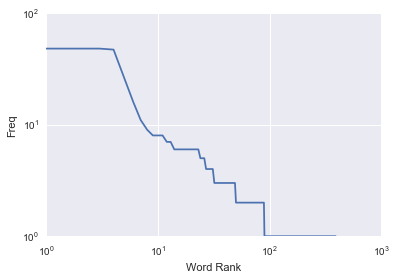

In [27]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.xlabel('Word Rank')
plt.ylabel('Freq');

Counts: [10, 22, 6, 5, 1, 5, 4, 1, 10, 10, 10, 10, 10, 10, 71, 6, 1, 4, 1, 126, 363, 2, 126, 1, 2, 6]


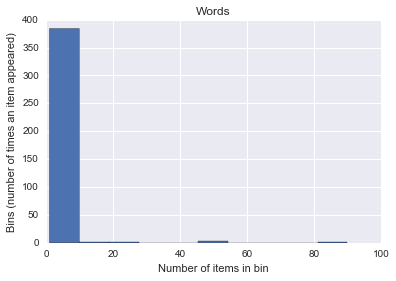

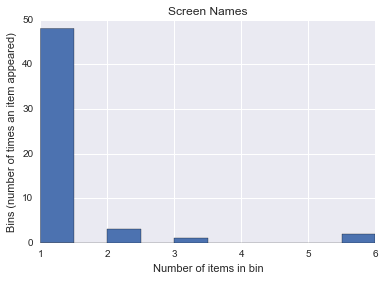

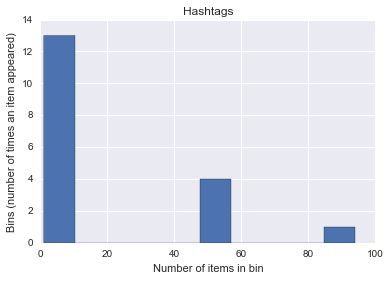

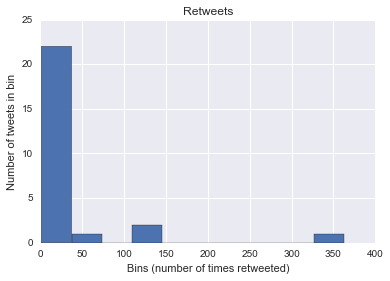

In [30]:
for label, data in (('Words', words),
                   ('Screen Names', screen_names),
                   ('Hashtags', hashtags)):
    c = Counter(data)
    plt.hist(c.values())
    
    plt.title(label)
    plt.xlabel('Number of items in bin')
    plt.ylabel('Bins (number of times an item appeared)')
    
    plt.figure()
    
counts = [count for count, __, __ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin');

print('Counts: {}'.format(counts))

## Exercisec